# Grant spending by town

Combine grant spending by town and produce:

    * output/4_grant_spending.csv
    
This file restricted to only include EDUCATION EQUALIZATION and ARRA STABILIZATION  and "ECS ALLIANCE DISTRICT",
"ALLIANCE DISTRICT STUDENT ACHIEVEMENT" grants.

# About the dat

The spreadsheets for these reports were downloaded from here: 

* https://www.csde.state.ct.us/public/dgm/grantreports1/PayDetlViewRpt.aspx

on Sept. 25 as CSV files for the fiscal years 04 through 18. 

However, some of these files had errors becuase they were not properly escaped. So the file fix.sh is a bash script that cleans the original files, so you can follow each fix.

In [1]:
import pandas as pd

In [2]:
def get_df(year):
    return pd.read_csv("data/GRANT_LEVELS/%s-paydetl.csv" % str(year))

get_df(2017).head()

,Town,VName,Vendor,VAddrs,VType,VGrp,Spons,CCode,Payment,PayDate,...,InvoiceNum,InvDate,Date2,CCode_A,TTYpe,CCode_B,Project,Acct,Qtr,Unnamed: 20
0,2,Ansonia,2,1,0,1,NaN,11000-16201-82079-2017-170002-,1562.0,10/21/2016,...,CM_SDE_NOV2016_00001_2016295,2016/10/21 #: CM_SDE_NOV2016_00001_2016295,10/21/2016,11000-16201-82079-2017,2,11000-16201-82079-170002,SDE000000000002,55070,QE-2 12/31,NaN
1,2,Ansonia,2,1,0,1,NaN,11000-16201-82079-2017-170002-,1562.0,5/22/2017,...,CM_SDE_JUN2017_00001_2017142,2017/05/22 #: CM_SDE_JUN2017_00001_2017142,05/22/2017,11000-16201-82079-2017,2,11000-16201-82079-170002,SDE000000000002,55070,QE-4 06/30,NaN
2,2,Ansonia,2,1,0,1,NaN,11000-16201-82079-2017-170002-,3126.0,3/30/2017,...,CM_SDE_APR2017_00001_2017089,2017/03/30 #: CM_SDE_APR2017_00001_2017089,03/30/2017,11000-16201-82079-2017,2,11000-16201-82079-170002,SDE000000000002,55070,QE-3 03/31,NaN
3,2,Ansonia,2,2,2,1,00200,11000-16211-82051-2017-170005-,3580.0,9/14/2016,...,STMCH_PUB_01-SEP2016-2016258,2016/09/14 #: STMCH_PUB_01-SEP2016-2016258,09/14/2016,11000-16211-82051-2017,2,11000-16211-82051-170005,SDE000000000002,55070,QE-1 09/30,NaN
4,2,Ansonia,2,2,2,1,00200,11000-16211-82051-2017-170005-,3580.0,10/4/2016,...,STMCH_PUB_01-OCT2016-2016278,2016/10/04 #: STMCH_PUB_01-OCT2016-2016278,10/04/2016,11000-16211-82051-2017,2,11000-16211-82051-170005,SDE000000000002,55070,QE-2 12/31,NaN


In [3]:
tmpdf =get_df(2017)
len(tmpdf["VName"].unique())

122

In [4]:
from datetime import datetime 

def to_date(dtstr, fmts=["%m/%d/%Y","%Y/%m/%d"]):
    for fmt in fmts:
        try:
            return datetime.strptime(str(dtstr),fmt).date()
        except:
            pass
    print "ERROR: %s" % str(dtstr)
    return dtstr

to_date("9/14/2016")

datetime.date(2016, 9, 14)

In [5]:
for c in get_df(2017).columns: print c

Town
VName
Vendor
VAddrs
VType
VGrp
Spons
CCode
Payment
PayDate
GrantName
InvoiceNum
InvDate
Date2
CCode_A
TTYpe
CCode_B
Project
Acct
Qtr
Unnamed: 20


In [6]:
def fix_date_cols(df, date_cols=["Date2"],quiet=False):
    ret = df.copy()
    
    for c in date_cols:
        ret[c] = ret[c].apply(to_date)
        
        if not quiet:
            pass
            print c, (ret[c].min(), ret[c].max())
    
    return ret

fix_date_cols(get_df(2015)).head()

Date2 (datetime.date(2014, 7, 8), datetime.date(2015, 6, 30))


,Town,VName,Vendor,VAddrs,VType,VGrp,Spons,CCode,Payment,PayDate,...,InvoiceNum,InvDate,Date2,CCode_A,TTYpe,CCode_B,Project,Acct,Qtr,Unnamed: 20
0,2,Ansonia,2,1,0,1,NaN,11000-12198-82079-2015-170036-,3000.0,9/26/2014,...,CM_SDE_SEP2014_00001_2014269,2014/09/26 #: CM_SDE_SEP2014_00001_2014269,2014-09-26,11000-12198-82079-2015,2,11000-12198-82079-170036,SDE000000000002,55050,QE-1 09/30,NaN
1,2,Ansonia,2,1,0,1,NaN,11000-12198-82079-2015-170036-,3000.0,10/24/2014,...,CM_SDE_NOV2014_00001_2014297,2014/10/24 #: CM_SDE_NOV2014_00001_2014297,2014-10-24,11000-12198-82079-2015,2,11000-12198-82079-170036,SDE000000000002,55050,QE-2 12/31,NaN
2,2,Ansonia,2,1,0,1,NaN,11000-12198-82079-2015-170036-,2000.0,11/21/2014,...,CM_SDE_DEC2014_00001_2014325,2014/11/21 #: CM_SDE_DEC2014_00001_2014325,2014-11-21,11000-12198-82079-2015,2,11000-12198-82079-170036,SDE000000000002,55050,QE-2 12/31,NaN
3,2,Ansonia,2,1,0,1,NaN,11000-12198-82079-2015-170036-,2000.0,12/19/2014,...,CM_SDE_JAN2015_00001_2014353,2014/12/19 #: CM_SDE_JAN2015_00001_2014353,2014-12-19,11000-12198-82079-2015,2,11000-12198-82079-170036,SDE000000000002,55050,QE-2 12/31,NaN
4,2,Ansonia,2,1,0,1,NaN,11000-12198-82079-2015-170036-,2000.0,1/23/2015,...,CM_SDE_FEB2015_00001_2015023,2015/01/23 #: CM_SDE_FEB2015_00001_2015023,2015-01-23,11000-12198-82079-2015,2,11000-12198-82079-170036,SDE000000000002,55050,QE-3 03/31,NaN


In [7]:
def get_clean_sheet(year, quiet=True):
    ret = fix_date_cols(get_df(year), quiet=quiet)
    
    return ret

get_clean_sheet(2016,quiet=False)#.dtypes

Date2 (datetime.date(2015, 7, 8), datetime.date(2016, 6, 28))


,Town,VName,Vendor,VAddrs,VType,VGrp,Spons,CCode,Payment,PayDate,...,InvoiceNum,InvDate,Date2,CCode_A,TTYpe,CCode_B,Project,Acct,Qtr,Unnamed: 20
0,2,Ansonia,2,1,0,1,NaN,11000-12198-82079-2016-170036-,3000.00,9/25/2015,...,CM_SDE_OCT2015_00001_2015268,2015/09/25 #: CM_SDE_OCT2015_00001_2015268,2015-09-25,11000-12198-82079-2016,2,11000-12198-82079-170036,SDE000000000002,55050,QE-1 09/30,NaN
1,2,Ansonia,2,1,0,1,NaN,11000-12198-82079-2016-170036-,3000.00,11/24/2015,...,CM_SDE_DEC2015_00001_2015328,2015/11/24 #: CM_SDE_DEC2015_00001_2015328,2015-11-24,11000-12198-82079-2016,2,11000-12198-82079-170036,SDE000000000002,55050,QE-2 12/31,NaN
2,2,Ansonia,2,1,0,1,NaN,11000-12198-82079-2016-170036-,2000.00,12/23/2015,...,CM_SDE_JAN2016_00001_2015357,2015/12/23 #: CM_SDE_JAN2016_00001_2015357,2015-12-23,11000-12198-82079-2016,2,11000-12198-82079-170036,SDE000000000002,55050,QE-2 12/31,NaN
3,2,Ansonia,2,1,0,1,NaN,11000-12198-82079-2016-170036-,1000.00,1/22/2016,...,CM_SDE_FEB2016_00001_2016022,2016/01/22 #: CM_SDE_FEB2016_00001_2016022,2016-01-22,11000-12198-82079-2016,2,11000-12198-82079-170036,SDE000000000002,55050,QE-3 03/31,NaN
4,2,Ansonia,2,1,0,1,NaN,11000-12198-82079-2016-170036-,3000.00,2/26/2016,...,CM_SDE_MAR2016_00001_2016057,2016/02/26 #: CM_SDE_MAR2016_00001_2016057,2016-02-26,11000-12198-82079-2016,2,11000-12198-82079-170036,SDE000000000002,55050,QE-3 03/31,NaN
5,2,Ansonia,2,1,0,1,NaN,11000-12198-82079-2016-170036-,4000.00,4/22/2016,...,CM_SDE_MAY2016_00001_2016113,2016/04/22 #: CM_SDE_MAY2016_00001_2016113,2016-04-22,11000-12198-82079-2016,2,11000-12198-82079-170036,SDE000000000002,55050,QE-4 06/30,NaN
6,2,Ansonia,2,1,0,1,NaN,11000-12198-82079-2016-170036-,9.00,5/26/2016,...,CM_SDE_JUN2016_00001_2016147,2016/05/26 #: CM_SDE_JUN2016_00001_2016147,2016-05-26,11000-12198-82079-2016,2,11000-12198-82079-170036,SDE000000000002,55050,QE-4 06/30,NaN
7,2,Ansonia,2,1,0,1,NaN,11000-16201-82079-2016-170002-,2000.00,9/25/2015,...,CM_SDE_OCT2015_00002_2015268,2015/09/25 #: CM_SDE_OCT2015_00002_2015268,2015-09-25,11000-16201-82079-2016,2,11000-16201-82079-170002,SDE000000000002,55070,QE-1 09/30,NaN
8,2,Ansonia,2,1,0,1,NaN,11000-16201-82079-2016-170002-,1000.00,10/25/2015,...,CM_SDE_NOV2015_00035_2015295,2015/10/25 #: CM_SDE_NOV2015_00035_2015295,2015-10-25,11000-16201-82079-2016,2,11000-16201-82079-170002,SDE000000000002,55070,QE-2 12/31,NaN
9,2,Ansonia,2,1,0,1,NaN,11000-16201-82079-2016-170002-,1000.00,12/23/2015,...,CM_SDE_JAN2016_00002_2015357,2015/12/23 #: CM_SDE_JAN2016_00002_2015357,2015-12-23,11000-16201-82079-2016,2,11000-16201-82079-170002,SDE000000000002,55070,QE-2 12/31,NaN


In [8]:
def get_all():
    frames = []
    for year in range(2004, 2019):
        fname = "data/GRANT_LEVELS/%s-paydetl.csv" % str(year)
        print ("Fetching %d: %s" % (year, fname))
        try:
            curr = get_clean_sheet(year,quiet=False).copy()
            curr["FYEAR"] = year
            print ("Found %d rows" % len(curr))
            frames.append(curr)
        except:
            pass
    return pd.concat(frames)
        
all_df = get_all()
all_df.to_csv("output/byproduct_4_all_grants.csv")

Fetching 2004: data/GRANT_LEVELS/2004-paydetl.csv
Date2 (datetime.date(2003, 7, 17), datetime.date(2004, 6, 28))
Found 15799 rows
Fetching 2005: data/GRANT_LEVELS/2005-paydetl.csv
Date2 (datetime.date(2004, 7, 15), datetime.date(2005, 6, 29))
Found 16311 rows
Fetching 2006: data/GRANT_LEVELS/2006-paydetl.csv
Date2 (datetime.date(2005, 7, 14), datetime.date(2006, 6, 26))
Found 15555 rows
Fetching 2007: data/GRANT_LEVELS/2007-paydetl.csv
Date2 (datetime.date(2006, 7, 10), datetime.date(2007, 6, 25))
Found 16007 rows
Fetching 2008: data/GRANT_LEVELS/2008-paydetl.csv
Date2 (datetime.date(2007, 7, 13), datetime.date(2008, 6, 26))
Found 15721 rows
Fetching 2009: data/GRANT_LEVELS/2009-paydetl.csv
Date2 (datetime.date(2008, 7, 10), datetime.date(2009, 6, 24))
Found 16108 rows
Fetching 2010: data/GRANT_LEVELS/2010-paydetl.csv
Date2 (datetime.date(2009, 7, 17), datetime.date(2010, 6, 30))
Found 18619 rows
Fetching 2011: data/GRANT_LEVELS/2011-paydetl.csv
Date2 (datetime.date(2010, 7, 7), dateti

/Users/jakekara/pandas/lib/python2.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


## Now that all the data are combined, some inspection....

In [9]:
print "Total number of rows"
len(all_df)

Total number of rows


236689

In [10]:
print "Total payments"
all_df["Payment"].sum()

Total payments


45045160531.04

In [11]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
print ("Total payments by year")
print all_df.groupby("FYEAR").agg({"Payment":sum}).sum()
all_df.groupby("FYEAR").agg({"Payment":sum})

Total payments by year
Payment   45045160531.040
dtype: float64


,Payment
FYEAR,
2004,2345173579.460
2005,2617910680.780
2006,2790298363.630
2007,2910811843.220
2008,3030931209.110
2009,3068875004.510
2010,3133000334.440
2011,3000623729.070
2012,3046094557.020


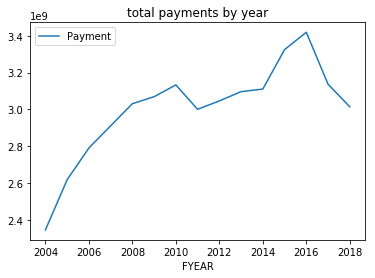

In [12]:
import matplotlib.pyplot as plt
all_df.groupby("FYEAR").agg({"Payment":sum}).plot(title="total payments by year")
plt.savefig("output/total-payments.png")

In [13]:
#all_df[all_df["GrantName"].str.contains("ARRA")]["GrantName"].value_counts()

# Clean grant names a little

Remove any extra whitespace
Uppercase
Remove any non-alphanum characters
Should I remove anythin in brackets, or is that too aggressive?


In [14]:
import re

def clean_grantname(gname):
    
    # upper case
    ret = str(gname).upper()

    # drop anything in brackets or parens
    ret = re.sub("\(.*\)"," ",ret)
    ret = re.sub("\[.*\]"," ",ret) 


    # Replace extra whitespace
    #ret = re.sub("\s{2+}","",ret)

    # Replace non-alphanums with spaces
    ret = re.sub("[^A-Z0-9 ]+"," ",ret)

    # Replace non-alphas -- too much?
    ret = re.sub("[^A-Z ]*","",ret)

    ret = ret.strip()
    return ret
    
try:
    # QUICK UNDO
    all_df["GrantName"] = all_df["GrantName_ORIGINAL"]
except:
    pass
    
clean_grantname("Local Charter Schls [270-Side by Side] 	")
all_df["GrantName_ORIGINAL"] = all_df["GrantName"]
all_df["GrantName"] = all_df["GrantName"].apply(clean_grantname)

In [15]:
all_df[all_df["GrantName"].apply(
lambda x:x in ["EDUCATION EQUALIZATION",
               "SPEC ED AG PLACEMENTS   EXCESS COST",
               "SPEC ED AG  PLACEMENTS   EXCESS COST",
               "SP ED EXCESS COST STUDENT BASED SUPPLEMENT",
               "TWO PERCENT EDUCATION COST SHARE GRANT",
               "SPECIAL ED EXCESS COST EQUITY",
               "SPED ED AG  PLACEMENTS   EXCESS COST",
               "EXCESS COST   NO NEXUS",
               "ECS ALLIANCE DISTRICT"])].groupby("FYEAR").agg({"Payment":sum})#.plot()

,Payment
FYEAR,
2004,1513644263.000
2005,1556751401.000
2006,1634269361.000
2007,1657576599.000
2008,1833967607.000
2009,1918060773.000
2010,1669644284.000
2011,1674874034.000
2012,1932613197.000


# Add in ARRA stabilization

If we just focus on Education Equalization grants, there's a major drop in 2010 and 11.

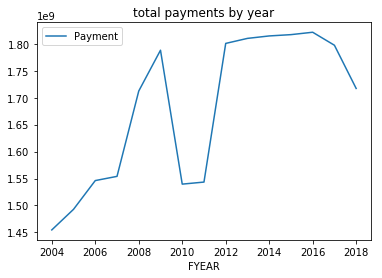

In [16]:
all_df[all_df["GrantName"] == "EDUCATION EQUALIZATION"].groupby("FYEAR").agg({"Payment":sum}).plot(title="total payments by year")

...So here are the grants that flatting that out. These ar the only grants we're interested in

In [17]:
for gn in all_df["GrantName"].unique():
    if "ALLIA" in gn:
        print "\"%s\"," % gn

"ECS ALLIANCE DISTRICT",
"ALLIANCE DISTRICT STUDENT ACHIEVEMENT",


In [18]:
all_df[all_df["GrantName"] == "ALLIANCE DISTRICT STUDENT ACHIEVEMENT"]

,Acct,CCode,CCode_A,CCode_B,Date2,FYEAR,GrantName,InvDate,InvoiceNum,PayDate,...,TTYpe,Town,Unnamed: 18,Unnamed: 20,VAddrs,VGrp,VName,VType,Vendor,GrantName_ORIGINAL
4301,55050.000,11000-10020-82010-2018- -,11000-10020-82010-2018,11000-10020-82010-,2018-05-24,2018,ALLIANCE DISTRICT STUDENT ACHIEVEMENT,2018/05/24 #: MOA_ALLIANCE_DISTRICT,MOA_ALLIANCE_DISTRICT,5/24/2018,...,59,59,nan,nan,1,1,Groton,0,59,Alliance District Student Achievement
10887,55050.000,11000-10020-82010-2018- -,11000-10020-82010-2018,11000-10020-82010-,2018-05-24,2018,ALLIANCE DISTRICT STUDENT ACHIEVEMENT,2018/05/24 #: MOA_ALLIANCE_DISTRICT,MOA_ALLIANCE_DISTRICT,5/24/2018,...,141,141,nan,nan,1,1,Thompson,0,141,Alliance District Student Achievement


In [19]:
all_df[all_df["GrantName"] == "ECS ALLIANCE DISTRICT"]

,Acct,CCode,CCode_A,CCode_B,Date2,FYEAR,GrantName,InvDate,InvoiceNum,PayDate,...,TTYpe,Town,Unnamed: 18,Unnamed: 20,VAddrs,VGrp,VName,VType,Vendor,GrantName_ORIGINAL
22,nan,11000-17041-82164-2013-170002-,11000-17041-82164-2013,11000-17041-82164-170002,2012-10-19,2013,ECS ALLIANCE DISTRICT,2012/10/19 #: CM_OCT2012_00001_2012293,CM_OCT2012_00001_2012293,10/19/2012,...,2,2,nan,nan,1,1,Ansonia,0,2,ECS Alliance District
23,nan,11000-17041-82164-2013-170002-,11000-17041-82164-2013,11000-17041-82164-170002,2012-12-24,2013,ECS ALLIANCE DISTRICT,2012/12/24 #: CM_JAN2013_00039_2012359,CM_JAN2013_00039_2012359,12/24/2012,...,2,2,nan,nan,1,1,Ansonia,0,2,ECS Alliance District
24,nan,11000-17041-82164-2013-170002-,11000-17041-82164-2013,11000-17041-82164-170002,2013-01-25,2013,ECS ALLIANCE DISTRICT,2013/01/25 #: CM_FEB2013_00002_2013025,CM_FEB2013_00002_2013025,1/25/2013,...,2,2,nan,nan,1,1,Ansonia,0,2,ECS Alliance District
25,nan,11000-17041-82164-2013-170002-,11000-17041-82164-2013,11000-17041-82164-170002,2013-02-22,2013,ECS ALLIANCE DISTRICT,2013/02/22 #: CM_MAR2013_00003_2013053,CM_MAR2013_00003_2013053,2/22/2013,...,2,2,nan,nan,1,1,Ansonia,0,2,ECS Alliance District
26,nan,11000-17041-82164-2013-170002-,11000-17041-82164-2013,11000-17041-82164-170002,2013-03-20,2013,ECS ALLIANCE DISTRICT,2013/03/20 #: CM_APR2013_00003_2013079,CM_APR2013_00003_2013079,3/20/2013,...,2,2,nan,nan,1,1,Ansonia,0,2,ECS Alliance District
27,nan,11000-17041-82164-2013-170002-,11000-17041-82164-2013,11000-17041-82164-170002,2013-05-24,2013,ECS ALLIANCE DISTRICT,2013/05/24 #: CM_JUN2013_00002_2013144,CM_JUN2013_00002_2013144,5/24/2013,...,2,2,nan,nan,1,1,Ansonia,0,2,ECS Alliance District
472,nan,11000-17041-82164-2013-170002-,11000-17041-82164-2013,11000-17041-82164-170002,2013-01-25,2013,ECS ALLIANCE DISTRICT,2013/01/25 #: CM_FEB2013_00003_2013025,CM_FEB2013_00003_2013025,1/25/2013,...,11,11,nan,nan,1,1,Bloomfield,0,11,ECS Alliance District
473,nan,11000-17041-82164-2013-170002-,11000-17041-82164-2013,11000-17041-82164-170002,2013-02-22,2013,ECS ALLIANCE DISTRICT,2013/02/22 #: CM_MAR2013_00002_2013053,CM_MAR2013_00002_2013053,2/22/2013,...,11,11,nan,nan,1,1,Bloomfield,0,11,ECS Alliance District
474,nan,11000-17041-82164-2013-170002-,11000-17041-82164-2013,11000-17041-82164-170002,2013-03-20,2013,ECS ALLIANCE DISTRICT,2013/03/20 #: CM_APR2013_00002_2013079,CM_APR2013_00002_2013079,3/20/2013,...,11,11,nan,nan,1,1,Bloomfield,0,11,ECS Alliance District
475,nan,11000-17041-82164-2013-170002-,11000-17041-82164-2013,11000-17041-82164-170002,2013-04-22,2013,ECS ALLIANCE DISTRICT,2013/04/22 #: CM_MAY2013_00002_2013112,CM_MAY2013_00002_2013112,4/22/2013,...,11,11,nan,nan,1,1,Bloomfield,0,11,ECS Alliance District


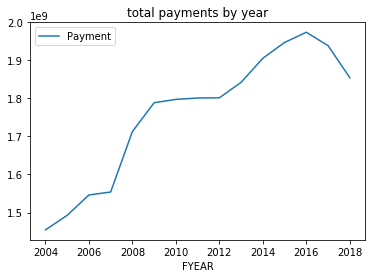

In [20]:

ecs_plus_grants = ["EDUCATION EQUALIZATION",
                   "ARRA STABILIZATION ED GRANTS",
                   "ARRA STABILIZATION GOV SERV",
                   "ECS ALLIANCE DISTRICT",
                   "ALLIANCE DISTRICT STUDENT ACHIEVEMENT",]
all_df[all_df["GrantName"].apply(lambda x: x in ecs_plus_grants )]\
.groupby("FYEAR").agg({"Payment":sum}).plot(title="total payments by year")

In [21]:
ecs_df = all_df[all_df["GrantName"].apply(lambda x: x in ecs_plus_grants)]
ecs_df["City"] = ecs_df["VName"].apply(lambda x: x.upper().strip())
ecs_df["report_year"] = ecs_df["FYEAR"]
ecs_df = ecs_df.groupby(["City","report_year"]).agg({"Payment":sum})
ecs_df

/Users/jakekara/pandas/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jakekara/pandas/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Payment
City      report_year             
ANSONIA   2004        11971916.000
          2005        12208280.000
          2006        12777406.000
          2007        12841646.000
          2008        14394773.000
          2009        14844939.000
          2010        14951227.000
          2011        14994722.000
          2012        14970112.000
          2013        15556139.000
          2014        15824433.000
          2015        16628198.000
          2016        16732022.000
          2017        16479494.000
          2018        16450373.000
AVON      2004          645790.000
          2005          779236.000
          2006          808870.000
          2007          788010.000
          2008         1191189.000
          2009         1243373.000
          2010         1107911.000
          2011         1227462.000
          2012         1254193.000
          2013         1215717.000
          2014         1232052.000
          2015         1258240.000
          2016         1207268.000
          2017          753989.000
          2018          615146.000
...                            ...
WOLCOTT   2004        10639082.000
          2005        10873468.000
          2006        11375354.000
          2007        11485669.000
          2008        13028064.000
          2009        13491998.000
          2010        13572217.000
          2011        13550781.000
          2012        13561773.000
          2013        13661846.000
          2014        13691399.000
          2015        13682019.000
          2016        13629079.000
          2017        13398204.000
          2018        11663926.000
WOODSTOCK 2004         4373641.000
          2005         4422603.000
          2006         4581325.000
          2007         4611341.000
          2008         5172193.000
          2009         5372686.000
          2010         5411278.000
          2011         5393770.000
          2012         5371030.000
          2013         5438657.000
          2014         5453432.000
          2015         5437489.000
          2016         5463678.000
          2017         5367539.000
          2018         4669358.000

[1830 rows x 1 columns]

In [22]:
ecs_df.to_csv("output/4_grant_spending.csv", float_format="%.0f")

In [23]:
all_df[all_df["GrantName"].apply(lambda x: x in ecs_plus_grants)].groupby("FYEAR").agg({"Payment":'sum'})

,Payment
FYEAR,
2004,1454524550.000
2005,1492783524.000
2006,1546163605.000
2007,1553963572.000
2008,1712452116.000
2009,1788247613.000
2010,1796967608.000
2011,1800577456.120
2012,1801082862.880


In [24]:
all_df[all_df["GrantName"].apply(lambda x: x in ecs_plus_grants)].groupby("FYEAR").agg({"Payment":'sum'}).to_csv("output/STATEWIDE_ECS.csv")

In [25]:
ecs_df.reset_index().groupby("report_year").agg({"Payment":'sum'})

,Payment
report_year,
2004,1454524550.000
2005,1492783524.000
2006,1546163605.000
2007,1553963572.000
2008,1712452116.000
2009,1788247613.000
2010,1796967608.000
2011,1800577456.120
2012,1801082862.880


In [26]:
combined = pd.read_csv("output/5_combined.csv")
combined.groupby("report_year").agg({"Grant Payments":'sum'})

,Grant Payments
report_year,
2002,0.000
2003,0.000
2004,1454524550.000
2005,1492783524.000
2006,1546163605.000
2007,1553963572.000
2008,1712452116.000
2009,1788247613.000
2010,1796967608.000


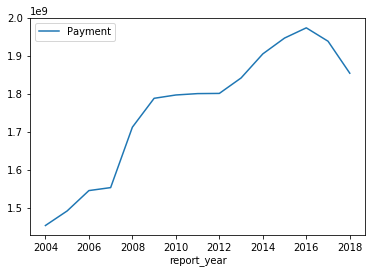

In [27]:
ecs_df.reset_index().groupby("report_year").agg({"Payment":'sum'}).plot()

### 